### **DATA PREPOCESSING**

**1. Import Library**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Read Dataset**

In [74]:
df=pd.read_csv('data_ecommerce_customer_churn.csv')

In [75]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [76]:
df.tail()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1
3940,2.0,7.0,3,Laptop & Accessory,5,Married,1,0,2.0,153.73,0


**3. Sanity Check of Data**

In [77]:
df.shape

(3941, 11)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [79]:
#finding missing value
df.isnull().sum()

,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


In [80]:
df.isnull().sum()/df.shape[0]*100

,0
Tenure,4.922608
WarehouseToHome,4.288252
NumberOfDeviceRegistered,0.000000
PreferedOrderCat,0.000000
SatisfactionScore,0.000000
MaritalStatus,0.000000
NumberOfAddress,0.000000
Complain,0.000000
DaySinceLastOrder,5.404720
CashbackAmount,0.000000


In [81]:
#finding duplicate data
df.duplicated().sum()

671

In [82]:
#finding garbage value
for i in df.select_dtypes(include='object').columns:
  print(i)
  print(df[i].value_counts())
  print("***"*10)

PreferedOrderCat
PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64
******************************
MaritalStatus
MaritalStatus
Married     2055
Single      1310
Divorced     576
Name: count, dtype: int64
******************************


**4.  Exploratory Data Analysis (EDA)**

In [83]:
#descriptive statistic
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [84]:
df.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


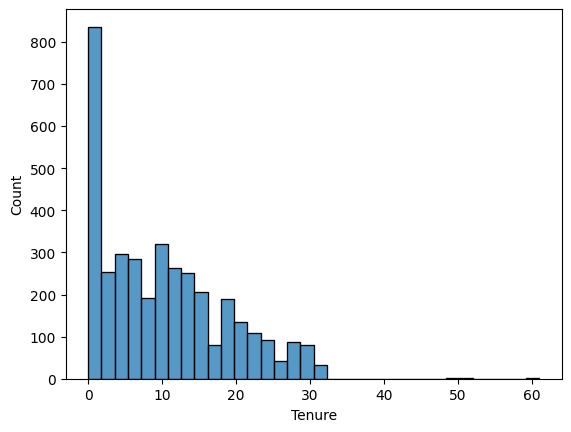

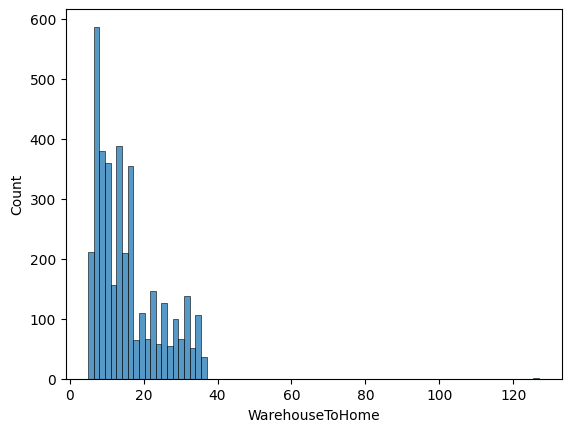

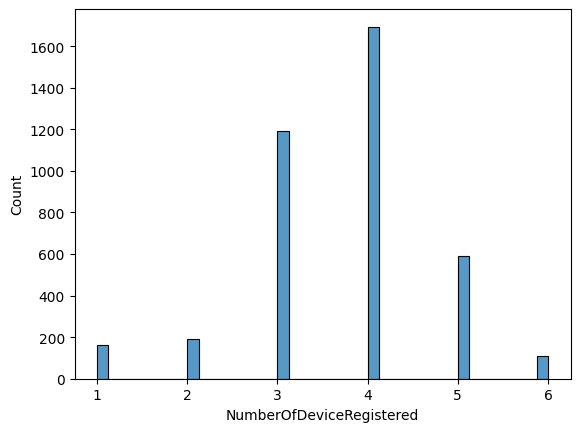

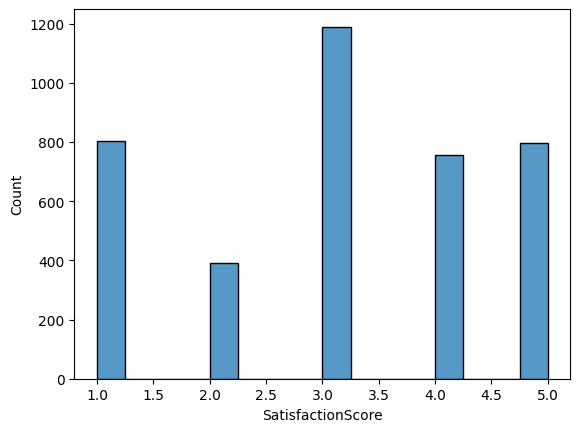

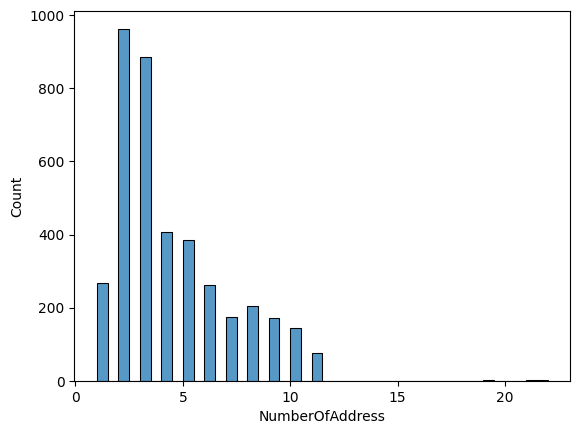

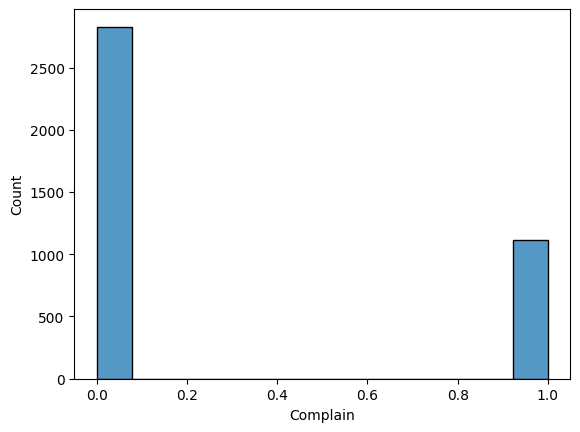

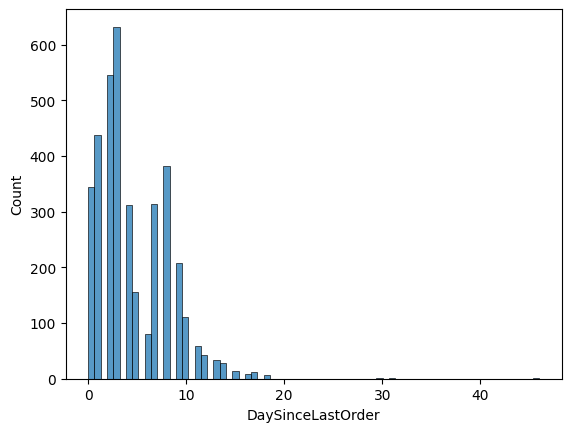

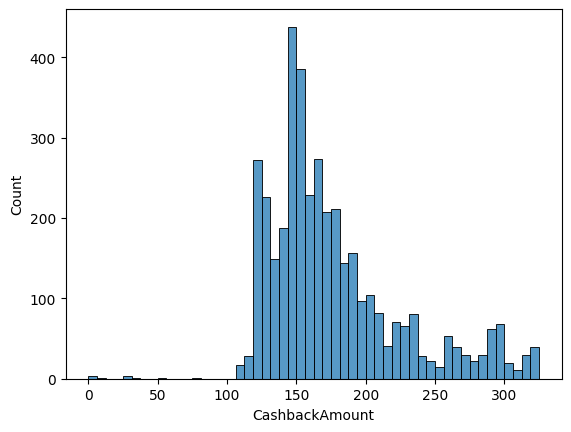

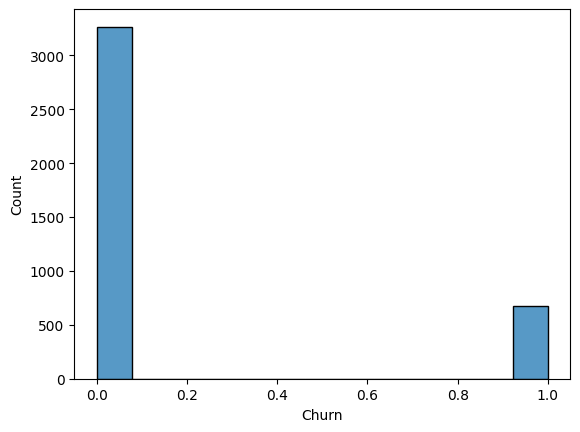

In [85]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df, x=i)
  plt.show()

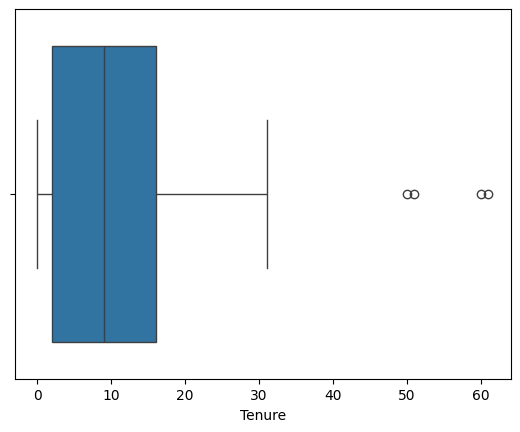

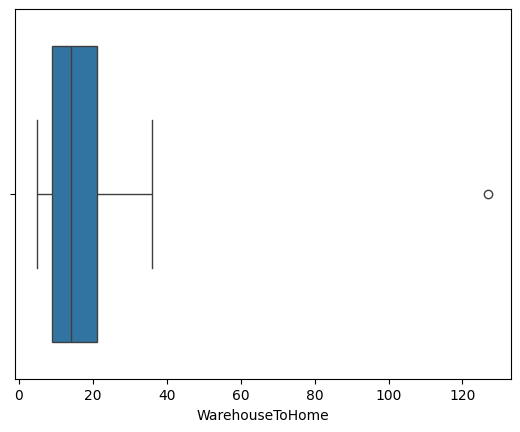

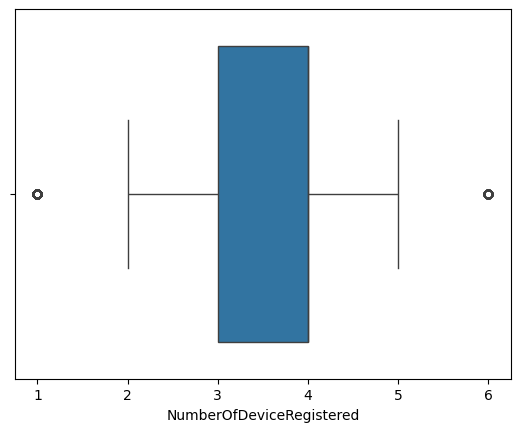

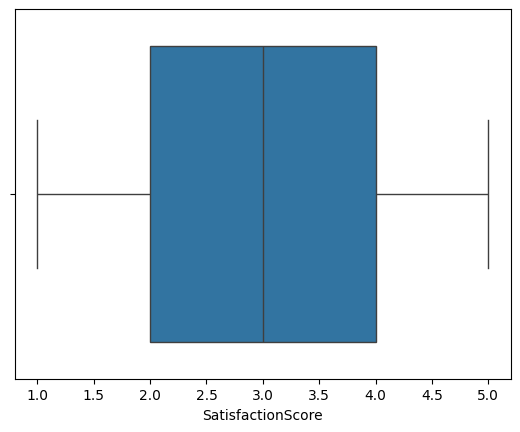

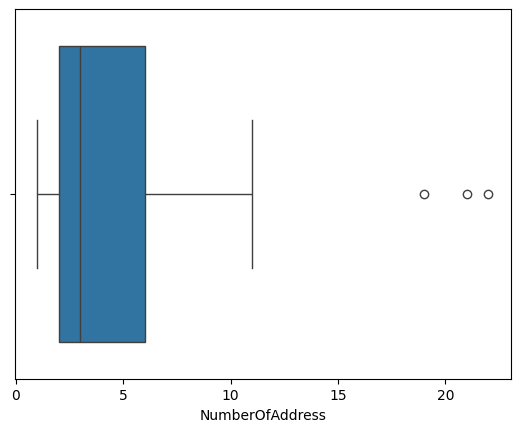

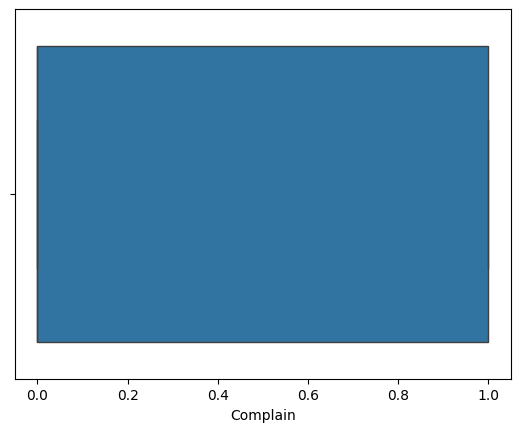

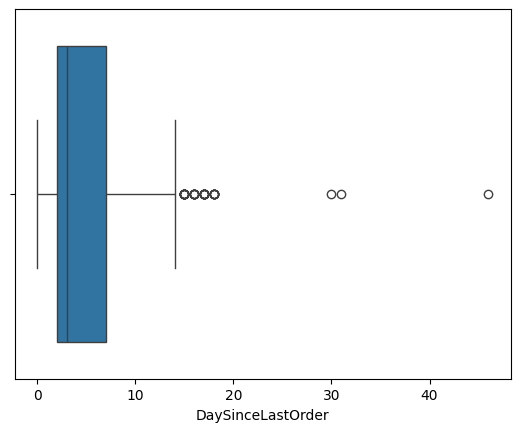

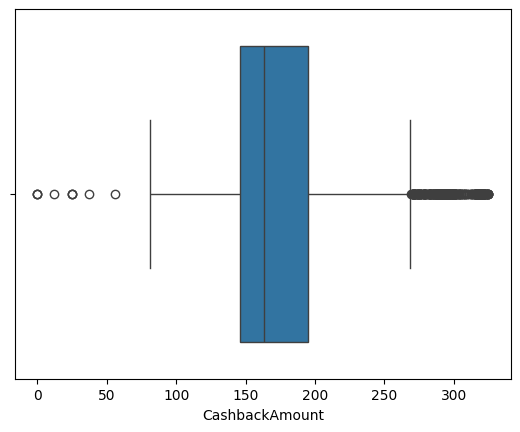

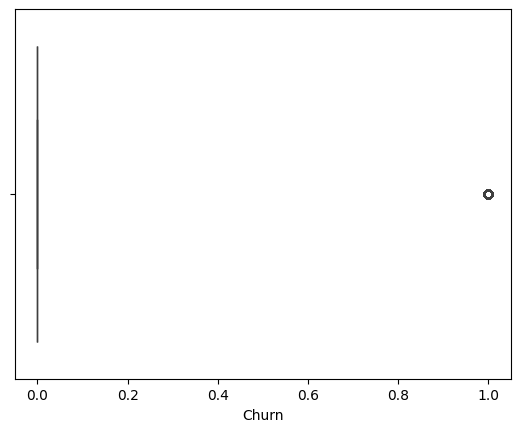

In [86]:
# Boxplot-to-identyfy Outliers
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

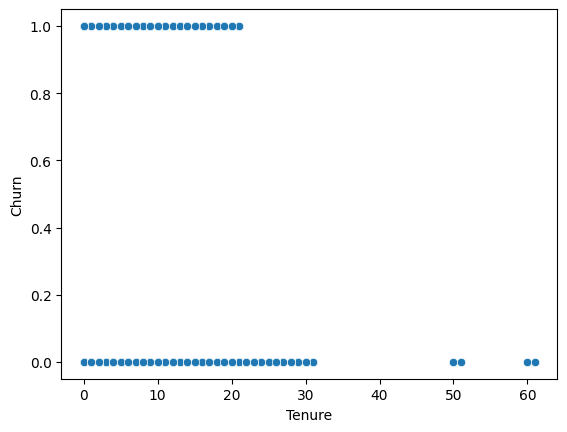

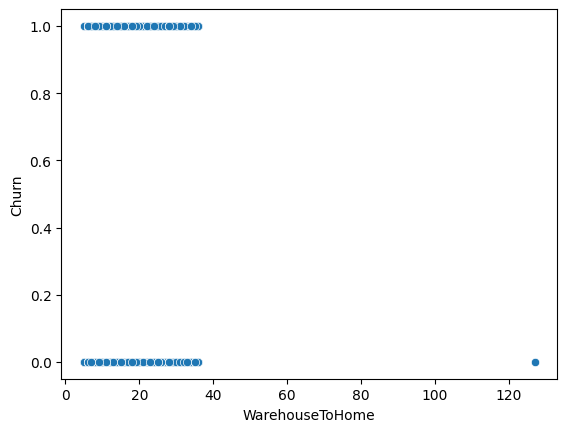

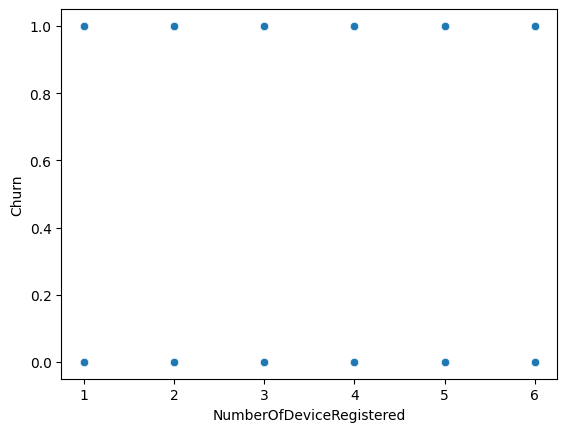

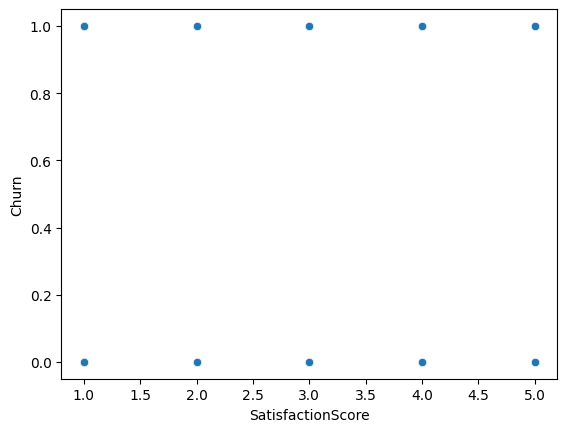

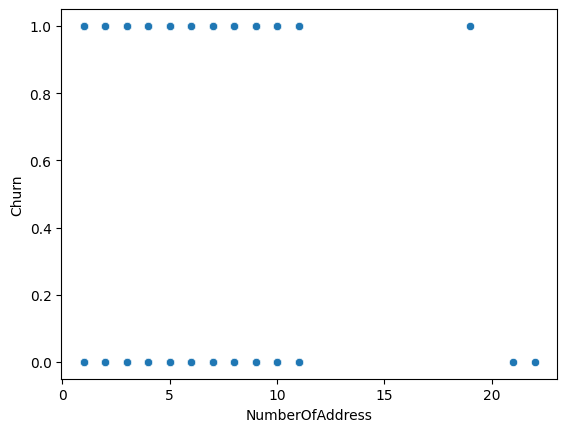

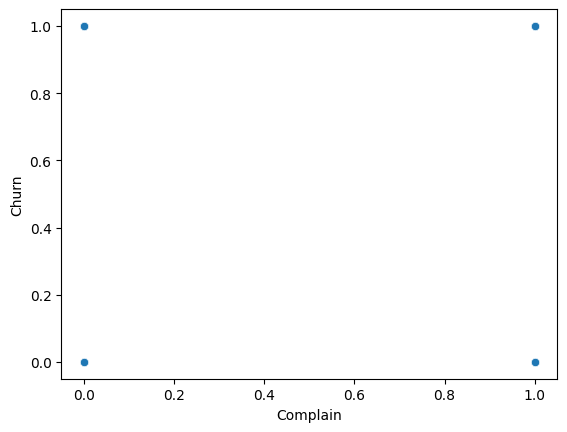

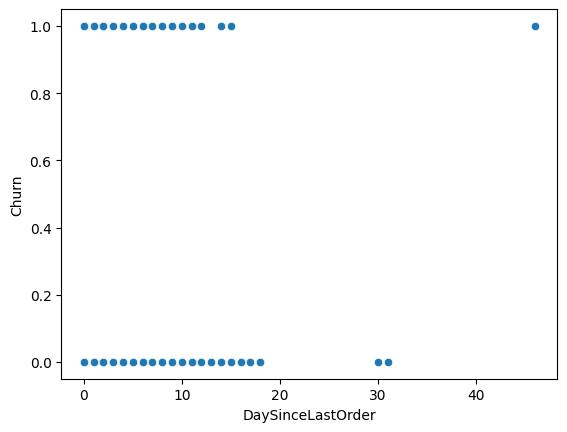

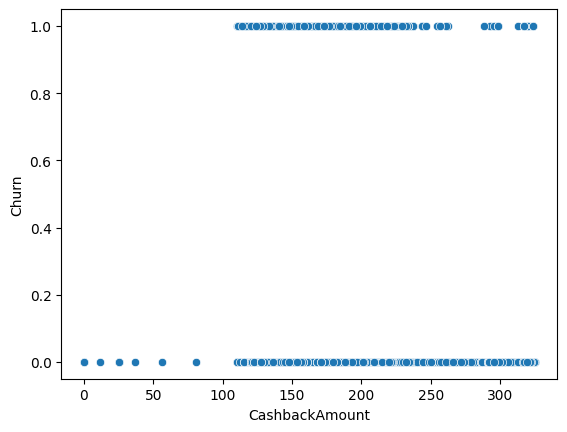

In [87]:
# Scatter plot to understand the relationship
for i in ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount']:
      sns.scatterplot(data=df, x=i, y='Churn')
      plt.show()

In [88]:
df.select_dtypes(include='number').columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [89]:
# Correlation whit heatmap to interpret the relation and multicolloniarity
s=df.select_dtypes(include='number').corr()

<Axes: >

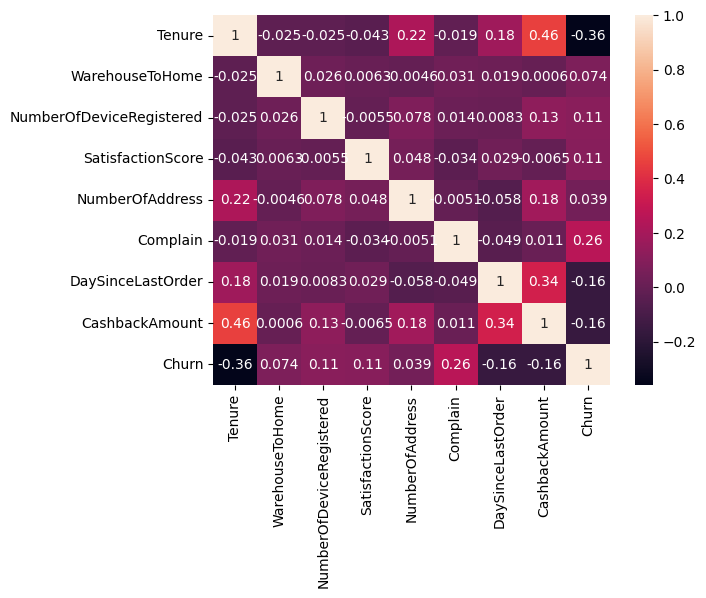

In [90]:
sns.heatmap(s, annot=True)

**5. Missing Value Treatments**

In [91]:
# Choose the method of imputing missing value
# Like mean, median, mode or KKNIputer
# Tenure, WarehouseToHome, DaySinceLastOrder are Number

In [92]:
# Replace null values in 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder' are Number with mean
for column in ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']:
  df[column].fillna(df[column].median(), inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3941 non-null   float64
 1   WarehouseToHome           3941 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3941 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [94]:
df.isnull().sum()

,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0


**6. Outliers Treatments**

In [95]:
# Decide whether to do outliers tratment or not, if do how?
# Numerical Continues data
def wiskers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return lower_bound, upper_bound

In [96]:
wiskers(df, 'CashbackAmount')

(71.37499999999997, 269.57500000000005)

In [97]:
wiskers(df, 'DaySinceLastOrder')

(-5.5, 14.5)

In [98]:
wiskers(df, 'Tenure')

(-15.0, 33.0)

In [99]:
wiskers(df, 'NumberOfAddress')

(-4.0, 12.0)

In [100]:
for i in ['CashbackAmount','DaySinceLastOrder','Tenure','NumberOfAddress']:
  lower_bound, upper_bound = wiskers(df, i)
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

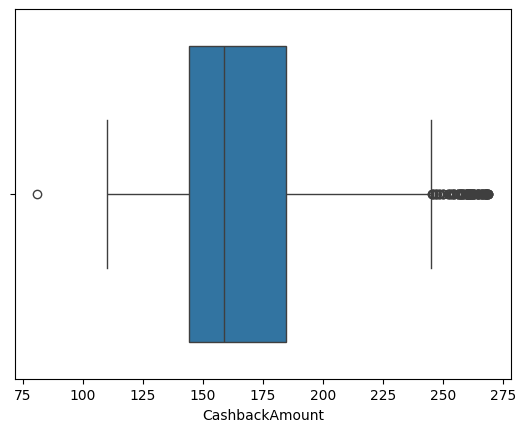

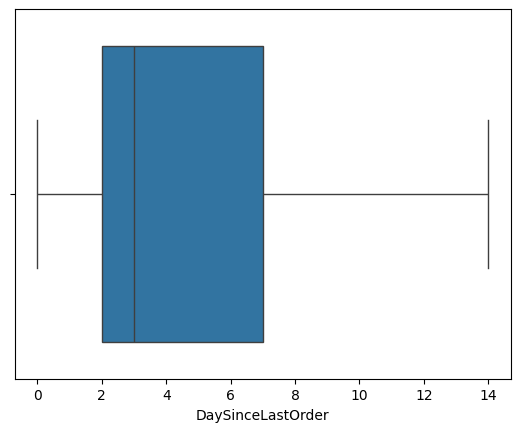

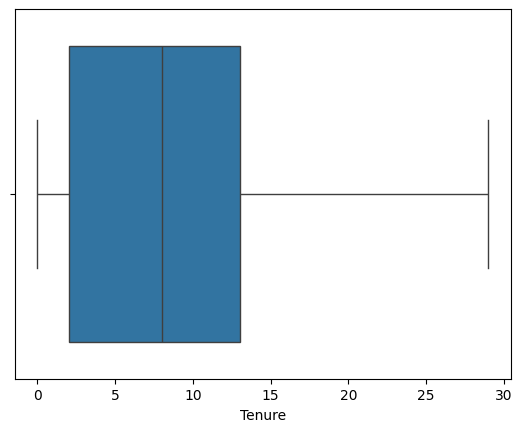

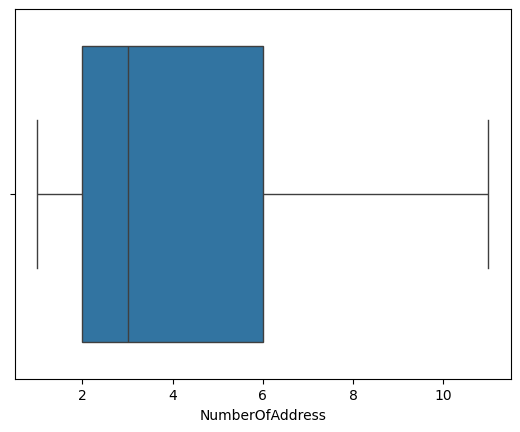

In [101]:
for i in ['CashbackAmount','DaySinceLastOrder','Tenure','NumberOfAddress']:
  sns.boxplot(data=df, x=i)
  plt.show()

**7. Duplicate Treatment**

In [102]:
df.duplicated().value_counts()

,count
False,2909
True,620


In [103]:
df.drop_duplicates(inplace=True)

In [104]:
df.duplicated().value_counts()

,count
False,2909


In [106]:
# prompt: Buat code mengganti data mobile dan mobile phone di PreferedOrderCat menjadi mobile phone

# Replace 'mobile' and 'mobile phone' with 'mobile phone' in 'PreferedOrderCat'
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile', 'Mobile Phone'], 'Mobile Phone')

In [107]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0


**8. Encoding of Data**

In [108]:
# Fitting the data into model we need all the column in the form of numerical
#Do label encoding and one hot encoding with pd.getdummies


In [110]:
df_cleaned=pd.get_dummies(df, columns=['PreferedOrderCat', 'MaritalStatus'], drop_first=True)

In [111]:
df_cleaned

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,0,False,True,False,False,True
1,7.0,25.0,4,1,2,0,7.0,129.29,0,False,False,True,True,False
2,27.0,13.0,3,1,5,0,7.0,168.54,0,False,True,False,True,False
3,20.0,25.0,4,3,7,0,3.0,230.27,0,False,False,False,False,False
5,7.0,16.0,4,2,2,0,11.0,152.81,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,14.0,18.0,3,2,4,1,0.0,147.66,0,False,False,True,False,False
3933,25.0,15.0,5,4,7,0,8.0,249.90,0,False,False,False,True,False
3936,28.0,9.0,5,3,8,0,1.0,231.86,0,False,False,False,True,False
3937,8.0,7.0,2,2,4,0,4.0,157.80,0,False,False,True,False,True


**9. Download the Clean Data**

In [112]:
print(df_cleaned.shape)
print(df_cleaned.info())
print(df_cleaned.describe())


(2909, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 2909 entries, 0 to 3940
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               2909 non-null   float64
 1   WarehouseToHome                      2909 non-null   float64
 2   NumberOfDeviceRegistered             2909 non-null   int64  
 3   SatisfactionScore                    2909 non-null   int64  
 4   NumberOfAddress                      2909 non-null   int64  
 5   Complain                             2909 non-null   int64  
 6   DaySinceLastOrder                    2909 non-null   float64
 7   CashbackAmount                       2909 non-null   float64
 8   Churn                                2909 non-null   int64  
 9   PreferedOrderCat_Grocery             2909 non-null   bool   
 10  PreferedOrderCat_Laptop & Accessory  2909 non-null   bool   
 11  PreferedOrderCat_Mobile 